# California K-12 Public Schools
## Meeting the Standards Projection

   <img src='images/shutterstock_213333985.jpeg' width="700">
   
   **Credit:**  [shutterstock](https://www.shutterstock.com/image-photo/school-books-on-desk-education-concept-213333985)


In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import pandas_profiling

warnings.filterwarnings("ignore")  # Suppress all warnings

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 
import scipy.stats as stats
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_context("poster")
sns.set(style='ticks')

# Modeling
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.linear_model import Lasso

In [2]:
# load file
language = pd.read_csv('data/df_language_with_dummies')

# copy original df
language_df = language.copy()

# Drop columns not useful for modeling
language_df = language_df.drop(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude'], axis=1)

# Transform percentage to 0-1
language_df[['Fluent English', 'English Learner', 'Ever-Els', 'Migrant',
       'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']] = language_df[['Fluent English', 'English Learner', 'Ever-Els', 'Migrant',
       'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']].div(100)

# Dimensions of the dataset 
print(language_df.shape)

# Overview of the data check all features are numeric
#language_df.info()

(9646, 58)


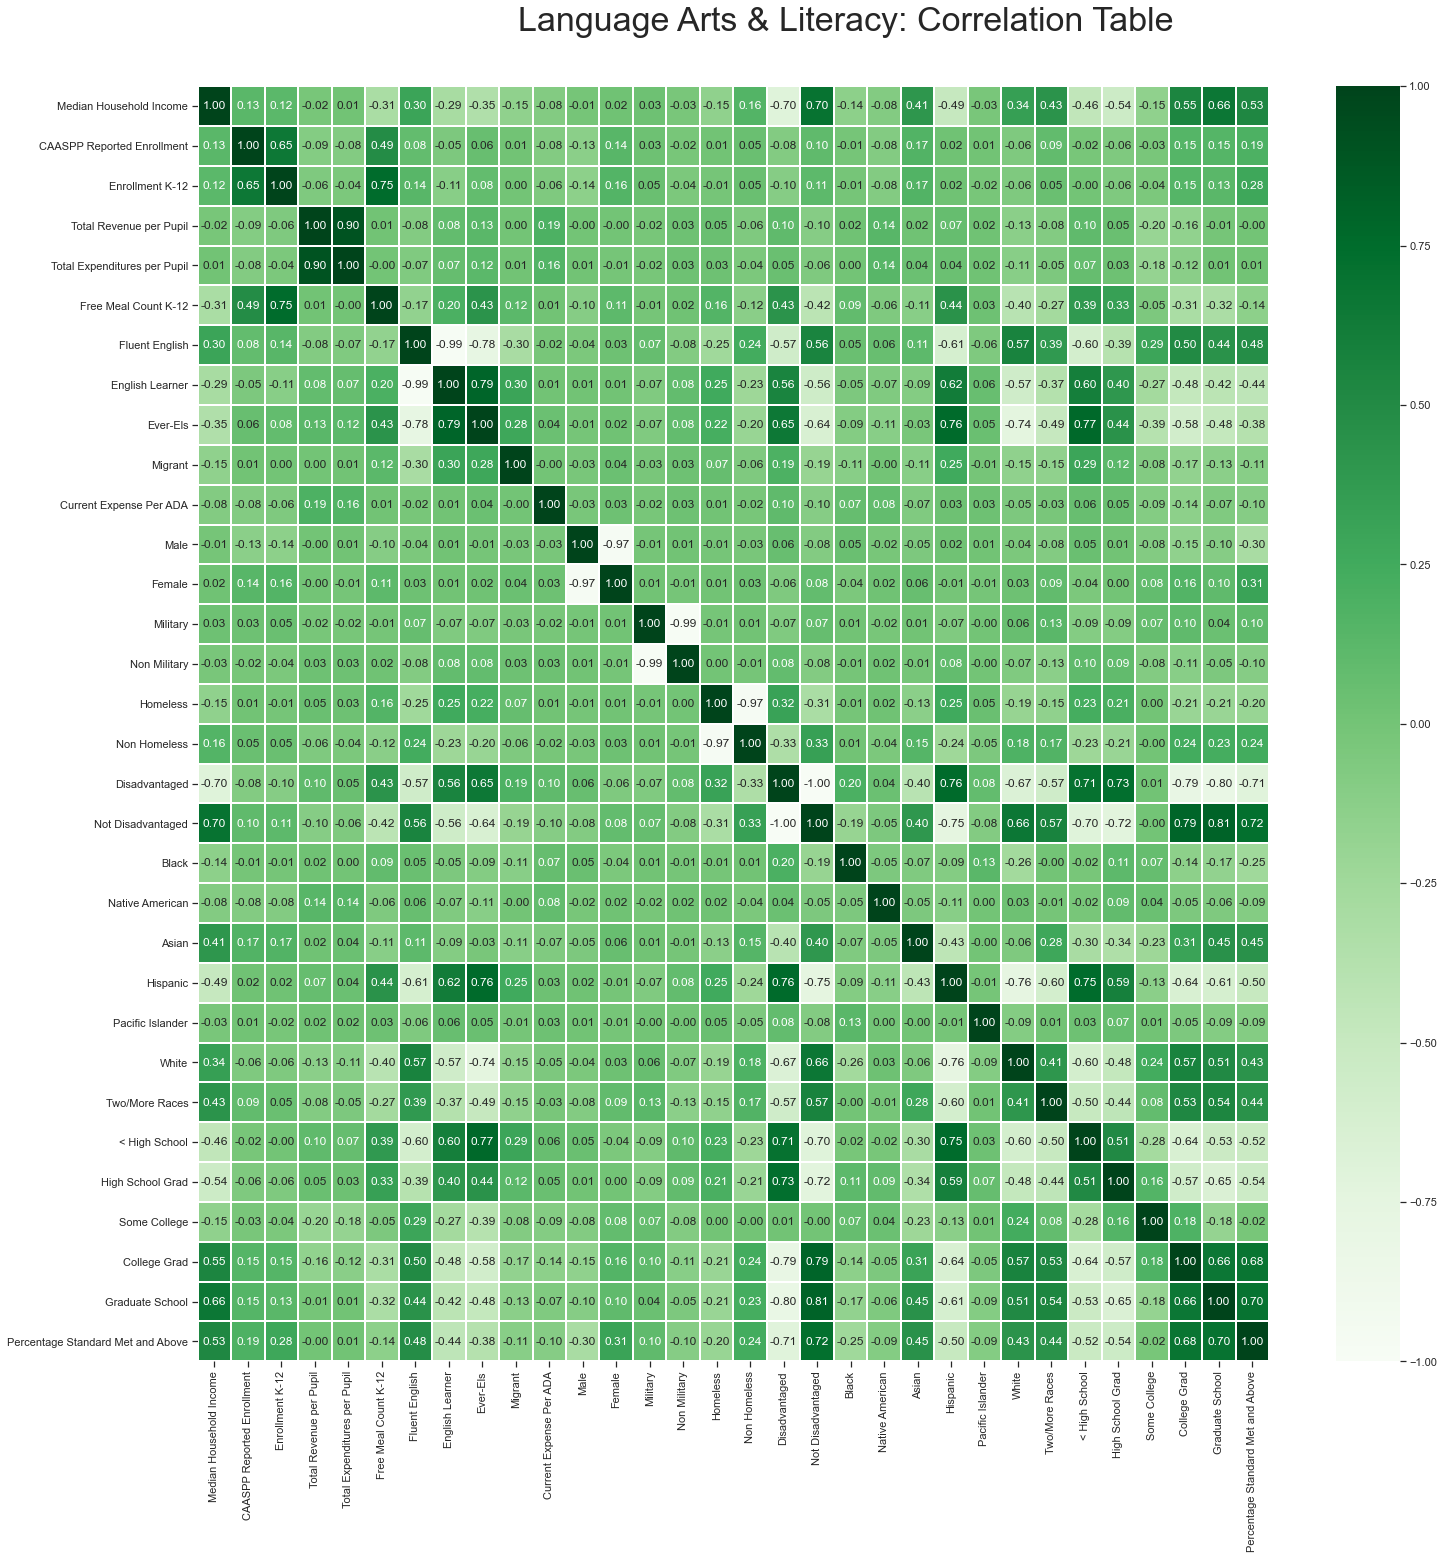

In [3]:
table = language_df[['Median Household Income', 'CAASPP Reported Enrollment','Enrollment K-12',
       'Total Revenue per Pupil','Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Fluent English','English Learner', 'Ever-Els', 'Migrant',            
       'Current Expense Per ADA', 'Male', 'Female','Military', 'Non Military','Homeless','Non Homeless',
       'Disadvantaged','Not Disadvantaged', 'Black','Native American','Asian','Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad', 'Some College','College Grad',
       'Graduate School','Percentage Standard Met and Above']]

# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, cmap="Greens", ax=ax, fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)

In [4]:
print(language_df['Percentage Standard Met and Above'].min())
print(language_df['Percentage Standard Met and Above'].max())

0.0
1.0


Text(0, 0.5, 'Number of schools')

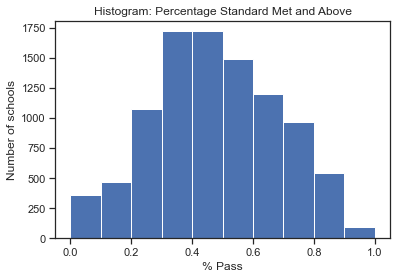

In [5]:
# distrubution of the dependent var
plt.hist(language_df['Percentage Standard Met and Above'])
plt.title("Histogram: Percentage Standard Met and Above")
plt.xlabel("% Pass")
plt.ylabel("Number of schools")

## Machine Learning Models
This is a regression problem, in supervised learning. The following models were applied:

- Linear Regression
    - Sklearn and Statsmodel
    - Detect multicollinearity with VIF (Variance Inflation Factor)
- LASSO
    - Dealing with 
- Decision Tree
- Random Forest
    - Pipeline
    - Feature importance
- Gradient Boost
- Logistic Regression
- PCA

### The following metrics are used for model performance:
   - MAE
   - MSE
   - RMSE
   - R_squared
   
Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train, validation) set. In order to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

#### Train/Test Split

In [6]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X minus dummy columns
X = language_df.drop(['Percentage Standard Met and Above', 
       'CAASPP Reported Enrollment-Dummy',
       'Enrollment K-12-Dummy','Fluent English-Dummy',
       'English Learner-Dummy',
       'Ever-Els-Dummy','Migrant-Dummy', 'Male-Dummy',
       'Female-Dummy', 'Military-Dummy',
       'Non Military-Dummy', 'Homeless-Dummy',
       'Non Homeless-Dummy', 'Disadvantaged-Dummy',
       'Not Disadvantaged-Dummy', 'Black-Dummy',
       'Native American-Dummy', 'Asian-Dummy',
       'Hispanic-Dummy',
       'Pacific Islander-Dummy', 'White-Dummy',
       'Two/More Races-Dummy', '< High School-Dummy',
       'High School Grad-Dummy',
       'Some College-Dummy', 'College Grad-Dummy',
       'Graduate School-Dummy'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7716, 31) y_train:  (7716,) X_test : (1930, 31) y_test:  (1930,)


In [7]:
X.columns

Index(['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Fluent English', 'English Learner',
       'Ever-Els', 'Migrant', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School'],
      dtype='object')

------

## 1. LINEAR REGRESSION

These are baseline models using Sklearn and Statsmodel. The following models contain all variables - including highly correlated ones - the progression can be seem as the models are refined and other modeling techniques are used.


### 1. a. Sklearn

In [8]:
# Create linear model
rModel = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales

In [9]:
# Train model call .fit() method of rModel
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [10]:
# Predict on both x train and x test
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

In [11]:
# Evaluate the model call .score() on rModel with parameters X_train, y_train
print(rModel.score(X_train, y_train).round(4), rModel.score(X_test, y_test).round(4))

0.7272 0.7438


In [12]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0818, 0.0798)
Mean Squared Error - train, test: (0.0117, 0.0107)
Root Mean Squared Error - train, test: (0.1082, 0.1033)
R-square - train, test: (0.7272, 0.7438)


Text(0, 0.5, 'Predicted values')

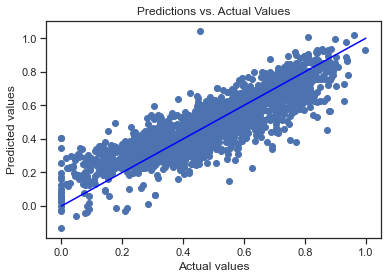

In [13]:
# Plot the predictions against the actual result
plt.scatter(y_test, y_te_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='blue')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

------

### 1. b. Statsmodel
- Ordinary Least Square Method (OLS)

In [14]:
# Create constants for X train and test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [15]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model
rModel2_results = rModel2.fit()

In [16]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.727
Model:                                           OLS   Adj. R-squared:                  0.726
Method:                                Least Squares   F-statistic:                     660.8
Date:                               Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                                       13:40:57   Log-Likelihood:                 6213.2
No. Observations:                               7716   AIC:                        -1.236e+04
Df Residuals:                                   7684   BIC:                        -1.214e+04
Df Model:                                         31                                         
Covariance Type:                           nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.7197      0.200     -3.596      0.000      -1.112      -0.327
Median Household Income      -1.769e-07   7.52e-08     -2.353      0.019   -3.24e-07   -2.95e-08
CAASPP Reported Enrollment   -6.211e-05    6.1e-06    -10.175      0.000   -7.41e-05   -5.01e-05
Enrollment K-12               4.681e-05   5.46e-06      8.566      0.000    3.61e-05    5.75e-05
Total Revenue per Pupil       5.831e-06   8.65e-07      6.738      0.000    4.13e-06    7.53e-06
Total Expenditures per Pupil -1.114e-06   8.27e-07     -1.346      0.178   -2.74e-06    5.08e-07
Free Meal Count K-12         -5.727e-06   9.99e-06     -0.573      0.566   -2.53e-05    1.38e-05
Current Expense Per ADA      -6.523e-07    2.7e-07     -2.415      0.016   -1.18e-06   -1.23e-07
Fluent English                   0.6921      0.063     11.028      0.000       0.569       0.815
English Learner                  0.3298      0.062      5.345      0.000       0.209       0.451
Ever-Els                         0.1825      0.014     12.835      0.000       0.155       0.210
Migrant                          0.2386      0.051      4.701      0.000       0.139       0.338
Male                            -0.3473      0.074     -4.695      0.000      -0.492      -0.202
Female                           0.1582      0.069      2.303      0.021       0.024       0.293
Military                        -0.0779      0.168     -0.463      0.643      -0.408       0.252
Non Military                    -0.2146      0.169     -1.266      0.205      -0.547       0.118
Homeless                         0.5212      0.081      6.437      0.000       0.362       0.680
Non Homeless                     0.5307      0.083      6.383      0.000       0.368       0.694
Disadvantaged                   -0.0999      0.066     -1.521      0.128      -0.229       0.029
Not Disadvantaged                0.0797      0.064      1.251      0.211      -0.045       0.205
Black                           -0.0417      0.026     -1.634      0.102      -0.092       0.008
Native American                 -0.1081      0.039     -2.798      0.005      -0.184      -0.032
Asian                            0.4203      0.025     17.035      0.000       0.372       0.469
Hispanic                         0.2545      0.022     11.618      0.000       0.212       0.297
Pacific Islander                -0.0684      0.109     -0.625      0.532      -0.283       0.146
White                            0.2118      0.022      9.619      0.000       0.169       0.255
Two/More Races                   0.1947      0.040      4.846      0.000       0.116       0.274
< High S

In [17]:
# Make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_te_pred = rModel2_results.predict(X_test)
y_tr_pred = rModel2_results.predict(X_train)

In [18]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0818, 0.0798)
Mean Squared Error - train, test: (0.0117, 0.0107)
Root Mean Squared Error - train, test: (0.1082, 0.1033)
R-square - train, test: (0.7272, 0.7438)


Text(0, 0.5, 'Predicted values')

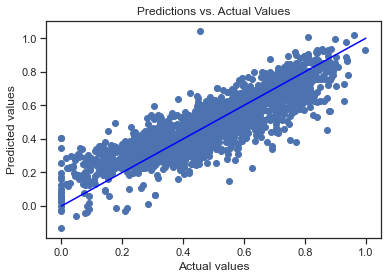

In [19]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_te_pred)

# Add a line for perfect correlation. Can you see what this line is doing? 
plt.plot([x for x in range(0,2)],[x for x in range(0,2)], color='blue')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

There are signs of multicollinearity in the analysis. For instance, the variable disadvantaged is highly correlated with the response variable but appears with not a significant coefficient in the regression analysis. Median houselhold income also has a positive correlation with the response variable and the coefficient sign is not logical. There are also variables with high pairwise relationship. In the following examples, the modeling addresses these issues.

The existence of multicollinearity in the dataset can result in an increase of the variance of regression coefficients leading to unstable estimation of parameter values. This in turn can lead to erroneous identification of relevant predictors within a regression and detracts from a model’s ability to extrapolate beyond the range of the sample it was constructed with. That is, overfitting is a side effect of multicollinearity.

-------------------

## 1. c. Detecting Multicollinearity with VIF


**The Variance Inflation Factor (VIF)**

The Variance Inflation Factor (VIF) measures the impact of collinearity among the variables in a regression model. The Variance Inflation Factor (VIF) is 1/Tolerance, it is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = language_df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(language_df.values, i) for i in range(len(language_df.columns))]
  
print(vif_data)

                              feature         VIF
0             Median Household Income    2.450696
1          CAASPP Reported Enrollment    2.458694
2    CAASPP Reported Enrollment-Dummy    0.000000
3                     Enrollment K-12    6.619322
4               Enrollment K-12-Dummy    1.264293
5             Total Revenue per Pupil    5.438119
6        Total Expenditures per Pupil    5.279518
7                Free Meal Count K-12    7.929771
8             Current Expense Per ADA    1.097731
9                      Fluent English   80.495211
10               Fluent English-Dummy    1.174565
11                    English Learner   83.382240
12              English Learner-Dummy    2.818908
13                           Ever-Els    8.881374
14                     Ever-Els-Dummy    2.270255
15                            Migrant    2.009666
16                      Migrant-Dummy    2.154926
17                               Male   40.826922
18                         Male-Dummy    1.374927



Since this is a project in the social sciences which deals with data that tends to correlate with one another naturally by environment, the threshold chosen for VIF is 10. Using the information provided by the pairwise correlation table, variables showing high pairwise relationship and high VIF are dropped from the model. In conclusion, VIF is very useful in highlighting multicollinearity, but it does not necessarily answer the question of which collinear feature shoud be dropped.



In [21]:
# Dropping highly correlated vars awith high vif score
X_vif = language_df.drop(['Fluent English', 'Fluent English-Dummy', 
                          'Female', 'Non Homeless', 'Non Homeless-Dummy', 'Enrollment K-12', 'Enrollment K-12-Dummy',
                          'Homeless', 'Non Homeless-Dummy','Not Disadvantaged', 'Not Disadvantaged-Dummy', 
                          'Non Military', 'Non Military-Dummy', 'White'], axis=1)

In [22]:
# Revisiting scores
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
  
print(vif_data)

                              feature          VIF
0             Median Household Income     2.333888
1          CAASPP Reported Enrollment     2.310606
2    CAASPP Reported Enrollment-Dummy  1145.142542
3             Total Revenue per Pupil     5.418828
4        Total Expenditures per Pupil     5.259617
5                Free Meal Count K-12     2.413810
6             Current Expense Per ADA     1.091901
7                     English Learner     3.864173
8               English Learner-Dummy     2.263475
9                            Ever-Els     8.708786
10                     Ever-Els-Dummy     2.217512
11                            Migrant     2.003378
12                      Migrant-Dummy     2.152645
13                               Male     1.701389
14                         Male-Dummy     1.180025
15                       Female-Dummy     1.460845
16                           Military     1.341566
17                     Military-Dummy     1.469325
18                     Homeless

-------

### 1. d. Re-run regression model adjusted for VIF scores

In [23]:
# Split data into test and training
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y, test_size = 0.20, random_state = 42)

# Create linear model
rModel_vif = linear_model.LinearRegression(normalize=True)

# Train model call .fit() method of rModel
rModel_vif.fit(X_train_vif, y_train_vif)

# Predict on both x train and x test
y_tr_pred_vif = rModel_vif.predict(X_train_vif)
y_te_pred_vif = rModel_vif.predict(X_test_vif)

In [24]:
# Evaluate the model call .score() on rModel with parameters X_train, y_train
# MAE
median_mae = mean_absolute_error(y_train_vif, y_tr_pred_vif).round(4), mean_absolute_error(y_test_vif, y_te_pred_vif).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train_vif, y_tr_pred_vif).round(4), mean_squared_error(y_test_vif, y_te_pred_vif).round(4)
# RMSE
median_rmse = mean_squared_error(y_train_vif, y_tr_pred_vif, squared=False).round(4), mean_squared_error(y_test_vif, y_te_pred_vif, squared=False).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0, 0.0)
Mean Squared Error - train, test: (0.0, 0.0)
Root Mean Squared Error - train, test: (0.0, 0.0)
R-square - train, test: (0.7272, 0.7438)


**Observation**: The evaluation metrics show that there is basically no improvement in the regression model. Let's try different models that are better "equipped" to handle highly correlated data.

-------

# 2. LASSO

LASSO is a regularization method with the capability of "selecting" variables by penalizing the high value coefficiients. In other word, lasso performs feature selection by shrinking some coefficients to zero, allowing the model to select a small number of variables as the final predictors. It uses L1 norm.

In [25]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X minus dummy columns
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [26]:
from numpy import arange

# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# define grid
grid = dict()
#grid['alpha'] = arange(0, 0.0001, 0.01, 1)
grid['alpha'] = np.logspace(-10, 1, 400)

# define search
search = GridSearchCV(estimator = model, 
                      param_grid = grid, 
                      scoring = 'neg_mean_absolute_error', 
                      cv = 3, 
                      n_jobs = -1)

# perform the search
results = search.fit(X, y)

# # summarize
# print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# Make predictions
y_te_pred = search.predict(X_test)
y_tr_pred = search.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print('Mean Absolute Error - train, test: ' + str(median_mae))
print('Mean Squared Error - train, test: ' + str(median_mse))
print('Root Mean Squared Error - train, test: ' + str(median_rmse))
print('R-square - train, test: ' + str(median_r2))

Config: {'alpha': 1.5239032437388273e-05}
Mean Absolute Error - train, test: (0.0805, 0.0777)
Mean Squared Error - train, test: (0.0112, 0.01)
Root Mean Squared Error - train, test: (0.1059, 0.1002)
R-square - train, test: (0.7386, 0.7586)


--------

### 2. a. LASSO Pipeline

In [27]:
features = list(X.columns)

In [28]:
from sklearn.pipeline import Pipeline

# Define pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', Lasso())])


In [29]:
# Run grid search for alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.001,10,0.1)},
                      cv = 3, scoring="neg_mean_squared_error",verbose=1
                      )

# Fit model
search.fit(X_train,y_train)

# Best alpha
search.best_params_

# Verify feature importance
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

#print('Coefficients: ', coefficients)
#print('Number of features: ', importance)

# Make predictions
y_te_pred = search.predict(X_test)
y_tr_pred = search.predict(X_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [30]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print('Mean Absolute Error - train, test: ' + str(median_mae))
print('Mean Squared Error - train, test: ' + str(median_mse))
print('Root Mean Squared Error - train, test: ' + str(median_rmse))
print('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0814, 0.0786)
Mean Squared Error - train, test: (0.0115, 0.0104)
Root Mean Squared Error - train, test: (0.1071, 0.1019)
R-square - train, test: (0.7326, 0.7504)


In [31]:
np.array(features)[importance > 0]

array(['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Enrollment K-12-Dummy',
       'Total Revenue per Pupil', 'Current Expense Per ADA',
       'Fluent English', 'Ever-Els', 'Ever-Els-Dummy', 'Migrant',
       'Migrant-Dummy', 'Male', 'Male-Dummy', 'Female', 'Military-Dummy',
       'Non Military', 'Homeless-Dummy', 'Non Homeless',
       'Non Homeless-Dummy', 'Disadvantaged-Dummy', 'Not Disadvantaged',
       'Not Disadvantaged-Dummy', 'Black', 'Native American',
       'Native American-Dummy', 'Asian', 'Asian-Dummy', 'Hispanic',
       'Hispanic-Dummy', 'Pacific Islander-Dummy', 'White', 'White-Dummy',
       'Two/More Races-Dummy', '< High School', '< High School-Dummy',
       'High School Grad', 'High School Grad-Dummy', 'Some College',
       'Some College-Dummy', 'College Grad', 'College Grad-Dummy',
       'Graduate School', 'Graduate School-Dummy'], dtype='<U32')

In [32]:
np.array(features)[importance == 0]

array(['CAASPP Reported Enrollment-Dummy', 'Total Expenditures per Pupil',
       'Free Meal Count K-12', 'Fluent English-Dummy', 'English Learner',
       'English Learner-Dummy', 'Female-Dummy', 'Military',
       'Non Military-Dummy', 'Homeless', 'Disadvantaged', 'Black-Dummy',
       'Pacific Islander', 'Two/More Races'], dtype='<U32')

--------

# 3. DECISION TREE

In [33]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X minus dummy columns
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [34]:
from sklearn.tree import DecisionTreeRegressor
from random import randint
from sklearn.model_selection import RandomizedSearchCV

# Inspect hyperparameters; choose the ones to tune

# Instantiate
dt = DecisionTreeRegressor()

# Define the grid hyperparameters
param_dist = {'max_depth': [20, 30, 40],
              'min_samples_leaf': [0.01, 0.04, 0.05]}

# Instantiate a k-fold CV grid search object
dt_cv = GridSearchCV(dt, param_dist, cv=3)

# Fit model - train
dt_cv.fit(X_train, y_train)

# Predict
y_pred = dt_cv.predict(X_test)

# Extract best hyperparameters
# Extract best cv score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))

# Extract best model
best_model = dt_cv.best_estimator_

# # Evaluate
# print("Best score is {}".format(dt_cv.best_score_))
# mse_dt = mean_squared_error(y_test, y_pred)
# rmse_dt = mse_dt**(1/2)
# print ('Mean Squared Error - test: ' + str(mse_dt))
# print ('Root Mean Squared Error - test: ' + str(rmse_dt))

Tuned Decision Tree Parameters: {'max_depth': 20, 'min_samples_leaf': 0.01}


In [35]:
# Make predictions
y_te_pred = best_model.predict(X_test)
y_tr_pred = best_model.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0832, 0.0851)
Mean Squared Error - train, test: (0.0121, 0.0125)
Root Mean Squared Error - train, test: (0.1102, 0.1117)
R-square - train, test: (0.717, 0.7001)


Text(0, 0.5, 'Predicted values')

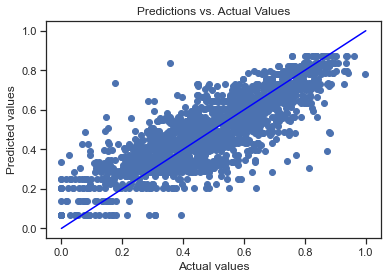

In [36]:
# Plot the predictions against the actual result
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='blue')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

-------

# 4. RANDOM FOREST

In [37]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X minus dummy columns
#X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

X = language_df.drop(['Percentage Standard Met and Above', 
       'CAASPP Reported Enrollment-Dummy',
       'Enrollment K-12-Dummy','Fluent English-Dummy',
       'English Learner-Dummy',
       'Ever-Els-Dummy','Migrant-Dummy', 'Male-Dummy',
       'Female-Dummy', 'Military-Dummy',
       'Non Military-Dummy', 'Homeless-Dummy',
       'Non Homeless-Dummy', 'Disadvantaged-Dummy',
       'Not Disadvantaged-Dummy', 'Black-Dummy',
       'Native American-Dummy', 'Asian-Dummy',
       'Hispanic-Dummy',
       'Pacific Islander-Dummy', 'White-Dummy',
       'Two/More Races-Dummy', '< High School-Dummy',
       'High School Grad-Dummy',
       'Some College-Dummy', 'College Grad-Dummy',
       'Graduate School-Dummy'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [38]:
# Import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 
rf = RandomForestRegressor(random_state = SEED)

# Print out hyperparameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [39]:
# Define hyperparameters
params_rf = {
        'n_estimators':[100, 350, 500],
        'max_features':['log2', 'auto', 'sqrt'],
        'min_samples_leaf':[2, 10, 30]}

# Instantiate a k-fold CV grid search object
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Fit train model
grid_rf.fit(X_train, y_train)
    
# Extract best hyperparameters
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best model
best_model = grid_rf.best_estimator_
    

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best hyerparameters:
 {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 500}


In [40]:
# Make predictions
y_te_pred = best_model.predict(X_test)
y_tr_pred = best_model.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0302, 0.0702)
Mean Squared Error - train, test: (0.0018, 0.0085)
Root Mean Squared Error - train, test: (0.0424, 0.092)
R-square - train, test: (0.9582, 0.7967)


-------

### 4. a. Random Forest Pipeline

In [41]:
# RandomForestRegressor() with a random state of 42
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=SEED)
)

# 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)

# R2
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

#np.mean(rf_cv_scores), np.std(rf_cv_scores)

array([0.76445351, 0.75944683, 0.75485141])

In [42]:
# TUNING PARAMETERS
n_est = [100, 200, 300]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]
}
grid_params

# Call GridSearchCV with the random forest pipeline
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

# Fit train model
rf_grid_cv.fit(X_train, y_train)

# Best parameters
rf_grid_cv.best_params_

# Extract best model
best_model_rf = rf_grid_cv.best_estimator_

In [43]:
# Make predictions
y_te_pred = best_model_rf.predict(X_test)
y_tr_pred = best_model_rf.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0274, 0.07)
Mean Squared Error - train, test: (0.0014, 0.0084)
Root Mean Squared Error - train, test: (0.0368, 0.0918)
R-square - train, test: (0.9684, 0.7974)


**Observation:** Random Forest performs better than Linear regression as expected, but not that much better. There might be overfitting taking place in the training data. Further hyperparameter tuning may improve that.

-----

### 4. b. Feature Importance 

                        Features  Importance scores
0        Median Household Income           0.001273
1     CAASPP Reported Enrollment           0.001887
2                Enrollment K-12           0.002272
3        Total Revenue per Pupil           0.002454
4   Total Expenditures per Pupil           0.003610
5           Free Meal Count K-12           0.003713
6        Current Expense Per ADA           0.007888
7                 Fluent English           0.008110
8                English Learner           0.008740
9                       Ever-Els           0.008744
10                       Migrant           0.010767
11                          Male           0.011252
12                        Female           0.011321
13                      Military           0.013107
14                  Non Military           0.013656
15                      Homeless           0.013734
16                  Non Homeless           0.013772
17                 Disadvantaged           0.014843
18          

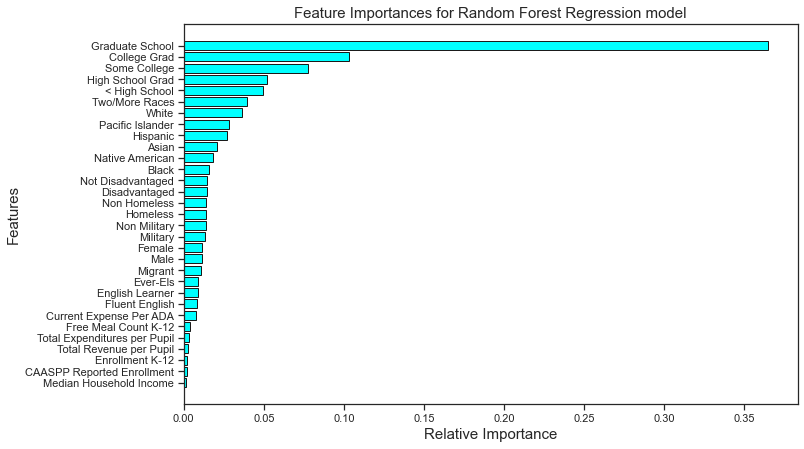

In [44]:
#Feature importances:
features = X
importances = list(best_model.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(11,7))

index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
_= plt.barh(index,imp, align='center',color='cyan', edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest Regression model',fontsize=15)
plt.show()

**Observation:** The most important features selected by the model to predict percentage of students passing test standards are level of education of parents (graduate and college), socioeconomic status (Disadvantaged), sex (schools with higher number of girls tend to outperform, while schools with higher number of boys tend to underperform), if they come from Asian background (Asian is highly correlated with having higher level of education), and English fluency. 

-----------

## 5. GRADIENT BOOSTING

Winner Model.

In [45]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [46]:
# Make predictions
y_te_pred = gb.predict(X_test)
y_tr_pred = gb.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0562, 0.0687)
Mean Squared Error - train, test: (0.0053, 0.0081)
Root Mean Squared Error - train, test: (0.0727, 0.0899)
R-square - train, test: (0.8766, 0.806)


Text(0, 0.5, 'Predicted values')

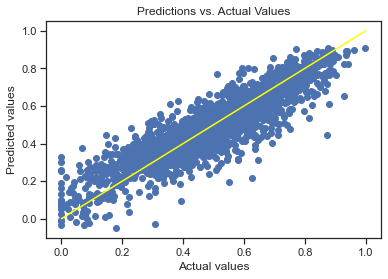

In [47]:
# Plot the predictions against the actual result
plt.scatter(y_test, y_te_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='yellow')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

------

### 5. a. Hyperparameter Tuning

In [48]:
# Set seed for reproducibility
SEED = 2

# Instantiate a random forests regressor 
gb = GradientBoostingRegressor(random_state = SEED)

# Print out hyperparameters
print(gb.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 2, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [49]:
# Tested hyperparameters
#max_depths = np.linspace(1, 32, 32, endpoint=True)
#min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
#max_features = list(range(1, X_train.shape[1]))

# Define hyperparameters
params_gb = {'learning_rate': [0.1], 
                'n_estimators': [300], 
                'max_depth': [26],
                'max_features': [8],
                'min_samples_leaf':  [100],
                'min_samples_split': [0.1]
                }

In [50]:
# Instantiate a k-fold CV grid search object
grid_gb = GridSearchCV(estimator = gb,
                       param_grid = params_gb,
                       scoring ='neg_mean_squared_error',
                       cv = 3,
                       verbose = 1,
                       n_jobs = -1)

# Fit gb to the training set
grid_gb.fit(X_train, y_train)

# Predict test set labels
y_pred = grid_gb.predict(X_test)

# Extract best hyperparameters
best_hyperparams = grid_gb.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best model
best_model_gb = grid_gb.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best hyerparameters:
 {'learning_rate': 0.1, 'max_depth': 26, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 0.1, 'n_estimators': 300}


In [51]:
# Make predictions
y_te_pred = best_model_gb.predict(X_test)
y_tr_pred = best_model_gb.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0465, 0.0669)
Mean Squared Error - train, test: (0.0039, 0.0077)
Root Mean Squared Error - train, test: (0.0625, 0.0877)
R-square - train, test: (0.909, 0.8152)


-----

### 5. b. Feature Importance

                        Features  Importance scores
0        Median Household Income           0.000616
1     CAASPP Reported Enrollment           0.001298
2                Enrollment K-12           0.001987
3        Total Revenue per Pupil           0.002172
4   Total Expenditures per Pupil           0.002667
5           Free Meal Count K-12           0.004537
6        Current Expense Per ADA           0.004799
7                 Fluent English           0.005235
8                English Learner           0.006691
9                       Ever-Els           0.008859
10                       Migrant           0.009010
11                          Male           0.010159
12                        Female           0.011463
13                      Military           0.012047
14                  Non Military           0.012437
15                      Homeless           0.012523
16                  Non Homeless           0.024087
17                 Disadvantaged           0.026399
18          

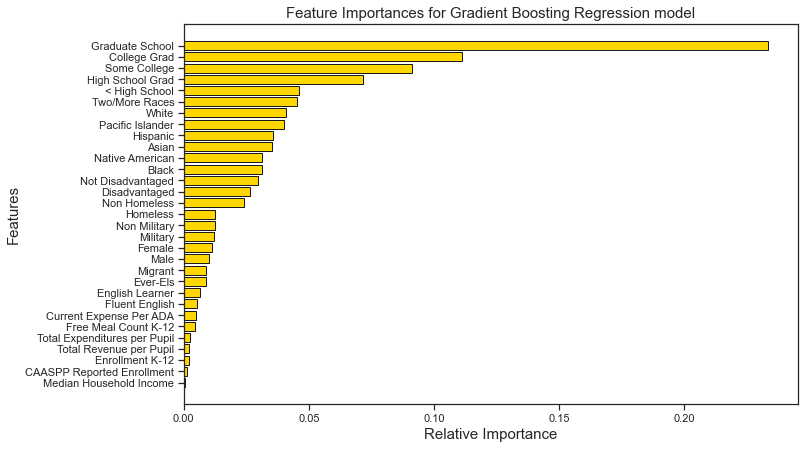

In [52]:
features = X
importances = list(best_model_gb.feature_importances_)
imp = np.sort(importances)
tab = pd.DataFrame(list(zip(X, imp)), columns = ['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(11,7))

#index = list(range(len(features)))
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
_= plt.barh(index, imp, align='center',color='gold', edgecolor='k')
plt.xlabel('Relative Importance', fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient Boosting Regression model',fontsize=15)
plt.show()

------

Next steps
<!-- 6. Conclusion:
In order to predict the cab booking cancellations, here we have considered a bunch of (17) features, either directly from the dataset or engineered/derived from the data. Interestingly, the engineeered features are the most important ones in terms of relative importances.

This is a classification problem. Here we have used the following classification models:

Logistic Regression
K-Nearest Neighbor (KNN)
Support vector machine (SVM)
Random Forest
Naive Bayes
Gradient Boost
Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

We have evaluated each models in terms of model accuracy score, and 'ROC-AUC' score for both the training and test data, and plotted them. The two best performing models are the Random forest and the Gradient boost. Both are the ensemble model, based on decision trees.

Next, we have carried out the grid search CV for the hyperparameter tuning for both the models seperately. This step was the most time consuming one in terms of computation. (The RF model took much longer time). With the result of the optimized hyperparameters, we have again fitted the two models, and got the predictions seperately.

We have evaluated the ROC-AUC scores with the optimized hyperparameters. Clearly, the model performance improved with the optimized parameters. The final ROC-AUC scores fro both RF and the GB are 0.886 and 0.899

The final prediction tables (Two columns: User ID and Car_cancellations) are saved as csv files.

7.Future direction:
There is enough room to improve the model.

Here we have used only the data of one year. The model can be improved, if we can use the data from another year.

Use ensembles of the machine learning models to average out bias and improve performance.

Try to use more feature engineering. Especially, here we have neglected the Latitude/longitude (GPS data) info. We could have etracted the route information out of them, and use that as a feature.

Try to fit and predict using the Extreme Gradient boost classifier model.
 -->


------